In [1]:
#Importing all the required Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
pd.set_option('display.max_colwidth', None)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBRegressor
from sklearn.svm import SVR

In [2]:
df_summary=pd.read_csv('all_season_summary.csv')

In [3]:
df_test=df_summary[['season','id','name','home_team','away_team','toss_won','decision','1st_inning_score','2nd_inning_score',
                    'winner','venue_name']]

In [4]:
df_test[(df_test.venue_name == 'Dubai International Cricket Stadium') & (df_test.winner != 'CSK') & 
        ((df_test.home_team == 'CSK') | (df_test.away_team == 'CSK'))]

,season,id,name,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,winner,venue_name
7,2021,1254094,Chennai Super Kings v Punjab Kings,CSK,PBKS,KXIP,BOWL FIRST,134/6,139/4,PBKS,Dubai International Cricket Stadium
10,2021,1254110,Delhi Capitals v Chennai Super Kings,DC,CSK,DC,BOWL FIRST,136/5,139/7,DC,Dubai International Cricket Stadium
66,2020,1216539,Chennai Super Kings v Delhi Capitals,CSK,DC,CSK,BOWL FIRST,175/3,131/7,DC,Dubai International Cricket Stadium
73,2020,1216516,Chennai Super Kings v Sunrisers Hyderabad,CSK,SRH,SRH,BAT FIRST,164/5,157/5,SRH,Dubai International Cricket Stadium
84,2020,1216525,Chennai Super Kings v Royal Challengers Bangalore,CSK,RCB,RCB,BAT FIRST,169/4,132/8,RCB,Dubai International Cricket Stadium


In [5]:
df_summary.head(20)

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2021,1254117,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"Final (N), Indian Premier League at Dubai, Oct 15 2021",CSK,KKR,KKR,BOWL FIRST,192/3,...,"Ruturaj Gaikwad (UKN),Faf du Plessis (UKN),Robin Uthappa (UKN),Moeen Ali (AR),Ambati Rayudu (UKN),MS Dhoni (WK),Ravindra Jadeja (AR),Dwayne Bravo (AR),Shardul Thakur (BL),Deepak Chahar (BL),Josh Hazlewood (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Nitish Rana (UKN),Sunil Narine (AR),Eoin Morgan (UKN),Dinesh Karthik (WK),Shakib Al Hasan (AR),Rahul Tripathi (UKN),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Shubman Gill,Venkatesh Iyer","Sunil Narine,Shivam Mavi",15 October 2021 - night match (20-over match),Richard Illingworth,Nitin Menon,Sundaram Ravi,Javagal Srinath,Virender Sharma
1,2021,1254116,Delhi Capitals v Kolkata Knight Riders,DC v KKR,"Qualifier 2 (N), Indian Premier League at Sharjah, Oct 13 2021",DC,KKR,KKR,BOWL FIRST,135/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Marcus Stoinis (AR),Shreyas Iyer (UKN),Rishabh Pant (WK),Shimron Hetmyer (UKN),Axar Patel (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Nitish Rana (UKN),Rahul Tripathi (UKN),Dinesh Karthik (WK),Eoin Morgan (UKN),Shakib Al Hasan (AR),Sunil Narine (AR),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Venkatesh Iyer,Shubman Gill","Varun Chakravarthy,Lockie Ferguson",13 October 2021 - night match (20-over match),KN Ananthapadmanabhan,Michael Gough,Chris Gaffaney,Manu Nayyar,Anil Chaudhary
2,2021,1254115,Royal Challengers Bangalore v Kolkata Knight Riders,RCB v KKR,"Eliminator (N), Indian Premier League at Sharjah, Oct 11 2021",RCB,KKR,RCB,BAT FIRST,138/7,...,"Devdutt Padikkal (UKN),Virat Kohli (UKN),Srikar Bharat (WK),Glenn Maxwell (AR),AB de Villiers (UKN),Shahbaz Ahmed (AR),Dan Christian (AR),Harshal Patel (BL),George Garton (AR),Mohammed Siraj (BL),Yuzvendra Chahal (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Rahul Tripathi (UKN),Nitish Rana (UKN),Sunil Narine (AR),Dinesh Karthik (WK),Eoin Morgan (UKN),Shakib Al Hasan (AR),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Shubman Gill,Venkatesh Iyer","Sunil Narine,Lockie Ferguson",11 October 2021 - night match (20-over match),Chris Gaffaney,Virender Sharma,Anil Chaudhary,Manu Nayyar,Sundaram Ravi
3,2021,1254114,Delhi Capitals v Chennai Super Kings,DC v CSK,"Qualifier 1 (N), Indian Premier League at Dubai, Oct 10 2021",DC,CSK,CSK,BOWL FIRST,172/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Shreyas Iyer (UKN),Axar Patel (AR),Rishabh Pant (WK),Shimron Hetmyer (UKN),Tom Curran (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Ruturaj Gaikwad (UKN),Faf du Plessis (UKN),Robin Uthappa (UKN),Shardul Thakur (BL),Ambati Rayudu (UKN),Moeen Ali (AR),MS Dhoni (WK),Ravindra Jadeja (AR),Dwayne Bravo (AR),Deepak Chahar (BL),Josh Hazlewood (BL)","Ruturaj Gaikwad,Robin Uthappa","Josh Hazlewood,Ravindra Jadeja",10 October 2021 - night match (20-over match),Richard Illingworth,Nitin Menon,Michael Gough,Javagal Srinath,KN Ananthapadmanabhan
4,2021,1254101,Royal Challengers Bangalore v Delhi Capitals,RCB v DC,"56th Match (N), Indian Premier League at Dubai, Oct 8 2021",RCB,DC,RCB,BOWL FIRST,164/5,...,"Virat Kohli (UKN),Devdutt Padikkal (UKN),Srikar Bharat (WK),AB de Villiers (UKN),Glenn Maxwell (AR),Dan Christian (AR),Shahbaz Ahmed (AR),George Garton (AR),Harshal Patel (BL),Mohammed Siraj (BL),Yuzvendra Chahal (BL)","Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Rishabh Pant (WK),Shreyas Iyer (UKN),Shimron Hetmyer (UKN),Ripal Patel (UKN),Axar Patel (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Prithvi Shaw,Shikhar Dhawan","Anrich Nortje,Axar Patel",8 October

In [6]:
df_summary.decision.value_counts()

BOWL FIRST    541
BAT FIRST     336
no toss         7
Name: decision, dtype: int64

In [7]:
df_summary.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [8]:
summary_null_vals=(df_summary.isnull()/len(df_summary))*100
summary_null_vals

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
880,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
881,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
882,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
#Function to exclude teams having insufficient data

def remove_teams(df,feat1,feat2): 
    #return df[~df['home_team'].str.contains("RPS|GL|PWI|Kochi")]
    return df[~((df[feat1].str.contains("RPS|GL|PWI|Kochi")) | (df[feat2].str.contains("RPS|GL|PWI|Kochi")))]

In [10]:
df_summary=remove_teams(df_summary,'home_team','away_team')

In [11]:
df_summary.head()

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
0,2021,1254117,Chennai Super Kings v Kolkata Knight Riders,CSK v KKR,"Final (N), Indian Premier League at Dubai, Oct 15 2021",CSK,KKR,KKR,BOWL FIRST,192/3,...,"Ruturaj Gaikwad (UKN),Faf du Plessis (UKN),Robin Uthappa (UKN),Moeen Ali (AR),Ambati Rayudu (UKN),MS Dhoni (WK),Ravindra Jadeja (AR),Dwayne Bravo (AR),Shardul Thakur (BL),Deepak Chahar (BL),Josh Hazlewood (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Nitish Rana (UKN),Sunil Narine (AR),Eoin Morgan (UKN),Dinesh Karthik (WK),Shakib Al Hasan (AR),Rahul Tripathi (UKN),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Shubman Gill,Venkatesh Iyer","Sunil Narine,Shivam Mavi",15 October 2021 - night match (20-over match),Richard Illingworth,Nitin Menon,Sundaram Ravi,Javagal Srinath,Virender Sharma
1,2021,1254116,Delhi Capitals v Kolkata Knight Riders,DC v KKR,"Qualifier 2 (N), Indian Premier League at Sharjah, Oct 13 2021",DC,KKR,KKR,BOWL FIRST,135/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Marcus Stoinis (AR),Shreyas Iyer (UKN),Rishabh Pant (WK),Shimron Hetmyer (UKN),Axar Patel (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Nitish Rana (UKN),Rahul Tripathi (UKN),Dinesh Karthik (WK),Eoin Morgan (UKN),Shakib Al Hasan (AR),Sunil Narine (AR),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Venkatesh Iyer,Shubman Gill","Varun Chakravarthy,Lockie Ferguson",13 October 2021 - night match (20-over match),KN Ananthapadmanabhan,Michael Gough,Chris Gaffaney,Manu Nayyar,Anil Chaudhary
2,2021,1254115,Royal Challengers Bangalore v Kolkata Knight Riders,RCB v KKR,"Eliminator (N), Indian Premier League at Sharjah, Oct 11 2021",RCB,KKR,RCB,BAT FIRST,138/7,...,"Devdutt Padikkal (UKN),Virat Kohli (UKN),Srikar Bharat (WK),Glenn Maxwell (AR),AB de Villiers (UKN),Shahbaz Ahmed (AR),Dan Christian (AR),Harshal Patel (BL),George Garton (AR),Mohammed Siraj (BL),Yuzvendra Chahal (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Rahul Tripathi (UKN),Nitish Rana (UKN),Sunil Narine (AR),Dinesh Karthik (WK),Eoin Morgan (UKN),Shakib Al Hasan (AR),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Shubman Gill,Venkatesh Iyer","Sunil Narine,Lockie Ferguson",11 October 2021 - night match (20-over match),Chris Gaffaney,Virender Sharma,Anil Chaudhary,Manu Nayyar,Sundaram Ravi
3,2021,1254114,Delhi Capitals v Chennai Super Kings,DC v CSK,"Qualifier 1 (N), Indian Premier League at Dubai, Oct 10 2021",DC,CSK,CSK,BOWL FIRST,172/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Shreyas Iyer (UKN),Axar Patel (AR),Rishabh Pant (WK),Shimron Hetmyer (UKN),Tom Curran (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Ruturaj Gaikwad (UKN),Faf du Plessis (UKN),Robin Uthappa (UKN),Shardul Thakur (BL),Ambati Rayudu (UKN),Moeen Ali (AR),MS Dhoni (WK),Ravindra Jadeja (AR),Dwayne Bravo (AR),Deepak Chahar (BL),Josh Hazlewood (BL)","Ruturaj Gaikwad,Robin Uthappa","Josh Hazlewood,Ravindra Jadeja",10 October 2021 - night match (20-over match),Richard Illingworth,Nitin Menon,Michael Gough,Javagal Srinath,KN Ananthapadmanabhan
4,2021,1254101,Royal Challengers Bangalore v Delhi Capitals,RCB v DC,"56th Match (N), Indian Premier League at Dubai, Oct 8 2021",RCB,DC,RCB,BOWL FIRST,164/5,...,"Virat Kohli (UKN),Devdutt Padikkal (UKN),Srikar Bharat (WK),AB de Villiers (UKN),Glenn Maxwell (AR),Dan Christian (AR),Shahbaz Ahmed (AR),George Garton (AR),Harshal Patel (BL),Mohammed Siraj (BL),Yuzvendra Chahal (BL)","Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Rishabh Pant (WK),Shreyas Iyer (UKN),Shimron Hetmyer (UKN),Ripal Patel (UKN),Axar Patel (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Prithvi Shaw,Shikhar Dhawan","Anrich Nortje,Axar Patel",8 October

In [12]:
df_summary=df_summary[~df_summary['winner'].isin(['RPS','GL', 'PWI', 'Kochi'])]

In [13]:
df_summary[(df_summary.winner == 'DC') & (df_summary.name.str.contains('Deccan Chargers'))]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
578,2012,548321,Delhi Daredevils v Deccan Chargers,DC v SRH,"23rd match (D/N), Indian Premier League at Delhi, Apr 19 2012",DC,SRH,SRH,BAT FIRST,157/8,...,"Naman Ojha (WK),Virender Sehwag (BT),Kevin Pietersen (BT),Mahela Jayawardene (BT),Ross Taylor (BT),Irfan Pathan (AR),Yogesh Nagar (AR),Ajit Agarkar (BL),Morne Morkel (BL),Umesh Yadav (BL),Shahbaz Nadeem (BL)","Kumar Sangakkara (BT),Shikhar Dhawan (BT),Parthiv Patel (WK),Daniel Christian (AR),Jean-Paul Duminy (AR),Bharat Chipli (BT),Abhishek Jhunjhunwala (BT),Dale Steyn (BL),Amit Mishra (BL),Ankit Sharma (BL),Veer Pratap Singh (UKN)","Parthiv Patel,Shikhar Dhawan",NaN,19 April 2012 - day/night match (20-over match),Shavir Tarapore,Billy Bowden,Vineet Kulkarni,Ranjan Madugalle,Sanjeev Dua
587,2012,548338,Kolkata Knight Riders v Deccan Chargers,KKR v DC,"32nd match (N), Indian Premier League at Kolkata, Apr 24 2012",KKR,SRH,no toss,no toss,NaN,...,"Sarabjit Ladda (BL),Lakshmipathy Balaji (BL),Rajat Bhatia (AR),Manvinder Bisla (UKN),Debabrata Das (UKN),Marchant de Lange (BL),Gautam Gambhir (BT),Brad Haddin (BT),Iqbal Abdulla (AR),Chirag Jani (UKN),Jacques Kallis (AR),Brett Lee (BL),Brendon McCullum (WK),Mohammed Shami (BL),Eoin Morgan (BT),Sunil Narine (AR),Yusuf Pathan (AR),James Pattinson (BL),Sanju Samson (BT),Pradeep Sangwan (BL),Iresh Saxena (UKN),Shakib Al Hasan (AR),Laxmi Shukla (AR),Ryan ten Doeschate (AR),Manoj Tiwary (BT),Jaydev Unadkat (BL)","Anand Rajan (BL),Ankit Sharma (BL),Ashish Reddy (AR),Tekkami Atchuta Rao (UKN),Akash Bhandari (BL),Darren Bravo (BT),Bharat Chipli (BT),Daniel Christian (AR),Kedar Devdhar (UKN),Shikhar Dhawan (BT),Jean-Paul Duminy (AR),Manpreet Gony (BL),Daniel Harris (UKN),Ishank Jaggi (BT),Abhishek Jhunjhunwala (BT),Chris Lynn (BT),Amit Mishra (BL),Tanmay Mishra (BT),Parthiv Patel (BT),Veer Pratap Singh (UKN),Syed Quadri (UKN),Dwaraka Ravi Teja (BT),Akshath Reddy (UKN),Biplab Samantray (UKN),Kumar Sangakkara (WK),Sneha Kishore (UKN),Sunny Sohal (BT),Tanmay Srivastava (BT),Dale Steyn (BL),TP Sudhindra (UKN),Rusty Theron (BL),Cameron White (BT),Arjun Yadav (BT)",NaN,NaN,24 April 2012 - night match (20-over match),Billy Bowden,Vineet Kulkarni,Shavir Tarapore,Javagal Srinath,Premdip Chatterjee
610,2012,548329,Deccan Chargers v Delhi Daredevils,SRH v DC,"55th match (D/N), Indian Premier League at Hyderabad (Deccan), May 10 2012",SRH,DC,SRH,BAT FIRST,187/4,...,"Daniel Harris (UKN),Shikhar Dhawan (BT),Kumar Sangakkara (BT),Cameron White (BT),Jean-Paul Duminy (AR),Parthiv Patel (WK),Ankit Sharma (BL),Ashish Reddy (AR),Amit Mishra (BL),Manpreet Gony (BL),TP Sudhindra (UKN)","Virender Sehwag (BT),David Warner (BT),Naman Ojha (WK),Mahela Jayawardene (BT),Yogesh Nagar (AR),Andre Russell (AR),Venugopal Rao (BT),Irfan Pathan (AR),Morne Morkel (BL),Shahbaz Nadeem (BL),Varun Aaron (BL)","Shikhar Dhawan,Cameron White",NaN,10 May 2012 - day/night match (20-over match),Johan Cloete,Simon Taufel,Sundaram Ravi,Javagal Srinath,KN Ananthapadmanabhan
677,2011,501243,Deccan Chargers v Delhi Daredevils,SRH v DC,"46th match (N), Indian Premier League at Hyderabad (Deccan), May 5 2011",SRH,DC,DC,BOWL FIRST,175/5,...,"Shikhar Dhawan (BT),Dwaraka Ravi Teja (BT),Kumar Sangakkara (WK),Jean-Paul Duminy (AR),Daniel Christian (AR),Bharat Chipli (BT),Ishan Malhotra (BL),Sunny Sohal (BT),Amit Mishra (BL),Dale Steyn (BL),Ishant Sharma (BL)","Aaron Finch (BT),Virender Sehwag (BT),Naman Ojha (WK),Venugopal Rao (BT),Travis Birt (BT),Irfan Pathan (AR),James Hopes (AR),Yogesh Nagar (AR),Morne Morkel (BL),Ajit Agarkar (BL),Aavishkar Salvi (BL)","Jean-Paul Duminy,Kumar Sangakkara",NaN,5 May 2011 - night match (20-over match),Amiesh Saheba,Asad Rauf,Suresh Shastri,Graeme Labrooy,Chettithody Shamshuddin
786,2009,392201,Deccan Chargers v Delhi Daredevils,SRH v DC,"21st match, In

In [14]:
df_summary[df_summary.name.str.contains('Delhi Capitals')]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,...,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
1,2021,1254116,Delhi Capitals v Kolkata Knight Riders,DC v KKR,"Qualifier 2 (N), Indian Premier League at Sharjah, Oct 13 2021",DC,KKR,KKR,BOWL FIRST,135/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Marcus Stoinis (AR),Shreyas Iyer (UKN),Rishabh Pant (WK),Shimron Hetmyer (UKN),Axar Patel (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Shubman Gill (UKN),Venkatesh Iyer (AR),Nitish Rana (UKN),Rahul Tripathi (UKN),Dinesh Karthik (WK),Eoin Morgan (UKN),Shakib Al Hasan (AR),Sunil Narine (AR),Lockie Ferguson (BL),Shivam Mavi (AR),Varun Chakravarthy (BL)","Venkatesh Iyer,Shubman Gill","Varun Chakravarthy,Lockie Ferguson",13 October 2021 - night match (20-over match),KN Ananthapadmanabhan,Michael Gough,Chris Gaffaney,Manu Nayyar,Anil Chaudhary
3,2021,1254114,Delhi Capitals v Chennai Super Kings,DC v CSK,"Qualifier 1 (N), Indian Premier League at Dubai, Oct 10 2021",DC,CSK,CSK,BOWL FIRST,172/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Shreyas Iyer (UKN),Axar Patel (AR),Rishabh Pant (WK),Shimron Hetmyer (UKN),Tom Curran (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Ruturaj Gaikwad (UKN),Faf du Plessis (UKN),Robin Uthappa (UKN),Shardul Thakur (BL),Ambati Rayudu (UKN),Moeen Ali (AR),MS Dhoni (WK),Ravindra Jadeja (AR),Dwayne Bravo (AR),Deepak Chahar (BL),Josh Hazlewood (BL)","Ruturaj Gaikwad,Robin Uthappa","Josh Hazlewood,Ravindra Jadeja",10 October 2021 - night match (20-over match),Richard Illingworth,Nitin Menon,Michael Gough,Javagal Srinath,KN Ananthapadmanabhan
4,2021,1254101,Royal Challengers Bangalore v Delhi Capitals,RCB v DC,"56th Match (N), Indian Premier League at Dubai, Oct 8 2021",RCB,DC,RCB,BOWL FIRST,164/5,...,"Virat Kohli (UKN),Devdutt Padikkal (UKN),Srikar Bharat (WK),AB de Villiers (UKN),Glenn Maxwell (AR),Dan Christian (AR),Shahbaz Ahmed (AR),George Garton (AR),Harshal Patel (BL),Mohammed Siraj (BL),Yuzvendra Chahal (BL)","Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Rishabh Pant (WK),Shreyas Iyer (UKN),Shimron Hetmyer (UKN),Ripal Patel (UKN),Axar Patel (AR),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Prithvi Shaw,Shikhar Dhawan","Anrich Nortje,Axar Patel",8 October 2021 - night match (20-over match),KN Ananthapadmanabhan,Nitin Menon,Krishnamachari Srinivasan,Prakash Bhatt,Navdeep Singh
10,2021,1254110,Delhi Capitals v Chennai Super Kings,DC v CSK,"50th Match (N), Indian Premier League at Dubai, Oct 4 2021",DC,CSK,DC,BOWL FIRST,136/5,...,"Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Shreyas Iyer (UKN),Rishabh Pant (WK),Ripal Patel (UKN),Ravichandran Ashwin (AR),Shimron Hetmyer (UKN),Axar Patel (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Ruturaj Gaikwad (UKN),Faf du Plessis (UKN),Robin Uthappa (UKN),Moeen Ali (AR),Ambati Rayudu (UKN),MS Dhoni (WK),Ravindra Jadeja (AR),Dwayne Bravo (AR),Deepak Chahar (BL),Shardul Thakur (BL),Josh Hazlewood (BL)","Ambati Rayudu,Robin Uthappa","Shardul Thakur,Ravindra Jadeja",4 October 2021 - night match (20-over match),Anil Chaudhary,Nitin Menon,Saiyed Khalid,Javagal Srinath,Anil Dandekar
14,2021,1254112,Mumbai Indians v Delhi Capitals,MI v DC,"46th Match, Indian Premier League at Sharjah, Oct 2 2021",MI,DC,DC,BOWL FIRST,129/8,...,"Rohit Sharma (UKN),Quinton de Kock (WK),Suryakumar Yadav (UKN),Saurabh Tiwary (UKN),Kieron Pollard (AR),Hardik Pandya (AR),Krunal Pandya (AR),Nathan Coulter-Nile (AR),Jayant Yadav (BL),Jasprit Bumrah (BL),Trent Boult (BL)","Prithvi Shaw (UKN),Shikhar Dhawan (UKN),Steven Smith (UKN),Rishabh Pant (WK),Shreyas Iyer (UKN),Axar Patel (AR),Shimron Hetmyer (UKN),Ravichandran Ashwin (AR),Kagiso Rabada (BL),Avesh Khan (BL),Anrich Nortje (BL)","Shreyas Iyer,Rishabh Pant","Avesh Khan,Axar Patel",2 October 2021 (20-over match),Anil Chaudha

In [15]:
df_summary.columns

Index(['season', 'id', 'name', 'short_name', 'description', 'home_team',
       'away_team', 'toss_won', 'decision', '1st_inning_score',
       '2nd_inning_score', 'home_score', 'away_score', 'winner', 'result',
       'start_date', 'end_date', 'venue_id', 'venue_name', 'home_captain',
       'away_captain', 'pom', 'points', 'super_over', 'home_overs',
       'home_runs', 'home_wickets', 'home_boundaries', 'away_overs',
       'away_runs', 'away_wickets', 'away_boundaries', 'highlights',
       'home_key_batsman', 'home_key_bowler', 'home_playx1', 'away_playx1',
       'away_key_batsman', 'away_key_bowler', 'match_days', 'umpire1',
       'umpire2', 'tv_umpire', 'referee', 'reserve_umpire'],
      dtype='object')

In [16]:
df_batting=pd.read_csv('all_season_batting_card.csv')

In [17]:
df_batting.drop('commentary',axis=1,inplace=True)

In [18]:
df_batting.head()

,season,match_id,match_name,home_team,away_team,venue,city,country,current_innings,innings_id,...,minutes,fours,sixes,strikeRate,captain,isNotOut,runningScore,runningOver,shortText,link
0,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,41,3.0,1.0,118.51,False,False,"{'wickets': 1, 'runs': 61}",8.1,c Shivam Mavi b Narine,NaN
1,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,104,7.0,3.0,145.76,False,False,"{'wickets': 3, 'runs': 192}",19.6,c Iyer b Shivam Mavi,NaN
2,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,26,0.0,3.0,206.66,False,False,"{'wickets': 2, 'runs': 124}",13.3,lbw b Narine,NaN
3,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,CSK,1,...,36,2.0,3.0,185.00,False,True,{},NaN,not out,NaN
4,2021,1254117,CSK v KKR,CSK,KKR,Dubai International Cricket Stadium,Dubai,United Arab Emirates,KKR,2,...,74,6.0,0.0,118.60,False,False,"{'wickets': 4, 'runs': 108}",13.2,lbw b Chahar,NaN


In [19]:
df_batting.columns

Index(['season', 'match_id', 'match_name', 'home_team', 'away_team', 'venue',
       'city', 'country', 'current_innings', 'innings_id', 'name', 'fullName',
       'runs', 'ballsFaced', 'minutes', 'fours', 'sixes', 'strikeRate',
       'captain', 'isNotOut', 'runningScore', 'runningOver', 'shortText',
       'link'],
      dtype='object')

In [20]:
df_batting=remove_teams(df_batting,'home_team','away_team')

In [21]:
df_batting_venue=df_batting[['match_id','venue']]

In [22]:
df_season=pd.read_csv('all_season_details.csv')

C:\Users\Susharan\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [23]:
df_season.head()

comment_id  season  match_id match_name home_team away_team  \
0         110    2021   1254117  CSK v KKR       CSK       KKR   
1         120    2021   1254117  CSK v KKR       CSK       KKR   
2         130    2021   1254117  CSK v KKR       CSK       KKR   
3         140    2021   1254117  CSK v KKR       CSK       KKR   
4         150    2021   1254117  CSK v KKR       CSK       KKR   

  current_innings  innings_id  over  ball  ...  wicket_id wkt_batsman_name  \
0             CSK           1     1     1  ...        NaN              NaN   
1             CSK           1     1     2  ...        NaN              NaN   
2             CSK           1     1     3  ...        NaN              NaN   
3             CSK           1     1     4  ...        NaN              NaN   
4             CSK           1     1     5  ...        NaN              NaN   

   wkt_bowler_name  wkt_batsman_runs  wkt_batsman_balls  wkt_text  \
0              NaN               NaN                NaN       NaN   
1              NaN               NaN                NaN       NaN   
2              NaN               NaN                NaN       NaN   
3              NaN               NaN                NaN       NaN   
4              NaN               NaN                NaN       NaN   

  isRetiredHurt  \
0         False   
1         False   
2         False   
3         False   
4         False   

                                                                                                                                                                   text  \
0                                                            goes pretty full on middle, as Gaikwad pushes at it to mid-off to take for a quick run to get off the mark   
1                                                                                                        pretty full and a touch wide of off. Bunted back to the bowler   
2                                                                             clips this good length ball on middle, which is angling in, toward midwicket for a single   
3  <strong>swept to deep square leg for the first four of the day!</strong> Short of a length on middle and leg, and he goes down on his back knee to send that packing   
4                                                                            this skids on off a good legthh on middle, and comes into him. Punched to the man at cover   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [24]:
df_season.describe()

,comment_id,season,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,207170.000000,207170.000000,2.071700e+05,207170.000000,207170.000000,207170.000000,207170.000000,2.071700e+05,207170.000000,207170.000000,...,207170.000000,207170.000000,1.961760e+05,196176.000000,196176.000000,196176.000000,196176.000000,1.010300e+04,10103.000000,10103.000000
mean,86222.357581,2014.425298,7.912771e+05,1.482729,10.150147,3.483984,1.304055,1.938343e+05,17.818931,14.141213,...,16.293971,13.199271,2.533650e+05,2.196005,0.025095,16.007029,0.543543,2.052800e+05,18.626745,15.345640
std,79444.901615,3.966167,3.211465e+05,0.499703,5.657938,1.707653,1.597028,2.438760e+05,18.118062,11.900393,...,17.529475,11.881047,2.709820e+05,1.045151,0.156999,10.047009,0.765478,2.507178e+05,19.257674,12.658784
min,110.000000,2008.000000,3.359820e+05,1.000000,1.000000,1.000000,0.000000,4.292000e+03,0.000000,0.000000,...,0.000000,0.000000,4.508000e+03,0.100000,0.000000,0.000000,0.000000,4.292000e+03,0.000000,0.000000
25%,18040.000000,2011.000000,5.012420e+05,1.000000,5.000000,2.000000,0.000000,3.210200e+04,4.000000,5.000000,...,3.000000,4.000000,3.268500e+04,1.000000,0.000000,8.000000,0.000000,3.224200e+04,4.000000,5.000000
50%,29010.000000,2014.000000,7.340090e+05,1.000000,10.000000,3.000000,1.000000,4.578900e+04,12.000000,11.000000,...,10.000000,10.000000,2.305580e+05,2.000000,0.000000,14.000000,0.000000,4.766000e+04,12.000000,12.000000
75%,118060.000000,2018.000000,1.136584e+06,2.000000,15.000000,5.000000,1.000000,2.907160e+05,26.000000,20.000000,...,24.000000,20.000000,4.229920e+05,3.000000,0.000000,22.000000,1.000000,3.197450e+05,27.000000,22.000000
max,219080.000000,2021.000000,1.254117e+06,2.000000,20.000000,7.000000,7.000000,1.206495e+06,174.000000,73.000000,...,174.000000,73.000000,1.246528e+06,4.000000,2.000000,70.000000,5.000000,1.201520e+06,127.000000,69.000000


In [25]:
df_season.columns

Index(['comment_id', 'season', 'match_id', 'match_name', 'home_team',
       'away_team', 'current_innings', 'innings_id', 'over', 'ball', 'runs',
       'shortText', 'isBoundary', 'isWide', 'isNoball', 'batsman1_id',
       'batsman1_name', 'batsman1_runs', 'batsman1_balls', 'bowler1_id',
       'bowler1_name', 'bowler1_overs', 'bowler1_maidens', 'bowler1_runs',
       'bowler1_wkts', 'batsman2_id', 'batsman2_name', 'batsman2_runs',
       'batsman2_balls', 'bowler2_id', 'bowler2_name', 'bowler2_overs',
       'bowler2_maidens', 'bowler2_runs', 'bowler2_wkts', 'wicket_id',
       'wkt_batsman_name', 'wkt_bowler_name', 'wkt_batsman_runs',
       'wkt_batsman_balls', 'wkt_text', 'isRetiredHurt', 'text', 'preText',
       'postText'],
      dtype='object')

In [26]:
df_season_filtered=df_season[['season','match_id','innings_id','current_innings','match_name','home_team','away_team','runs']]

In [27]:
df_season_filtered.head()

,season,match_id,innings_id,current_innings,match_name,home_team,away_team,runs
0,2021,1254117,1,CSK,CSK v KKR,CSK,KKR,1
1,2021,1254117,1,CSK,CSK v KKR,CSK,KKR,0
2,2021,1254117,1,CSK,CSK v KKR,CSK,KKR,1
3,2021,1254117,1,CSK,CSK v KKR,CSK,KKR,4
4,2021,1254117,1,CSK,CSK v KKR,CSK,KKR,0


In [28]:
df_season_filtered.columns

Index(['season', 'match_id', 'innings_id', 'current_innings', 'match_name',
       'home_team', 'away_team', 'runs'],
      dtype='object')

In [29]:
df_season_filtered=df_season_filtered.groupby(['season','match_id','innings_id','current_innings','match_name',
                                              'home_team','away_team'],as_index=False).agg({'runs':'sum'}).reset_index()

In [30]:
df_season_filtered

,index,season,match_id,innings_id,current_innings,match_name,home_team,away_team,runs
0,0,2008,335982,1,KKR,RCB v KKR,RCB,KKR,222
1,1,2008,335982,2,RCB,RCB v KKR,RCB,KKR,82
2,2,2008,335983,1,CSK,KXIP v CSK,KXIP,CSK,240
3,3,2008,335983,2,KXIP,KXIP v CSK,KXIP,CSK,207
4,4,2008,335984,1,RR,DC v RR,DC,RR,129
...,...,...,...,...,...,...,...,...,...
1745,1745,2021,1254115,2,KKR,RCB v KKR,RCB,KKR,139
1746,1746,2021,1254116,1,DC,DC v KKR,DC,KKR,135
1747,1747,2021,1254116,2,KKR,DC v KKR,DC,KKR,136
1748,1748,2021,1254117,1,CSK,CSK v KKR,CSK,KKR,192


In [31]:
df_summary_filtered=df_summary[['season','id','toss_won','decision','winner']]

In [32]:
df_summary_filtered.rename(columns={'id':'match_id'},inplace=True)

C:\Users\Susharan\anaconda3\lib\site-packages\pandas\core\frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [33]:
df_summary_filtered.head()

,season,match_id,toss_won,decision,winner
0,2021,1254117,KKR,BOWL FIRST,CSK
1,2021,1254116,KKR,BOWL FIRST,KKR
2,2021,1254115,RCB,BAT FIRST,KKR
3,2021,1254114,CSK,BOWL FIRST,CSK
4,2021,1254101,RCB,BOWL FIRST,RCB


In [34]:
#df_merged=df_season_filtered.merge(df_summary_filtered,how='left',right_on=['season','id'],left_on=['season','match_id'])
df_merged=df_season_filtered.merge(df_summary_filtered,on='match_id')

In [35]:
df_merged.head()

,index,season_x,match_id,innings_id,current_innings,match_name,home_team,away_team,runs,season_y,toss_won,decision,winner
0,0,2008,335982,1,KKR,RCB v KKR,RCB,KKR,222,2008,RCB,BOWL FIRST,KKR
1,1,2008,335982,2,RCB,RCB v KKR,RCB,KKR,82,2008,RCB,BOWL FIRST,KKR
2,2,2008,335983,1,CSK,KXIP v CSK,KXIP,CSK,240,2008,CSK,BAT FIRST,CSK
3,3,2008,335983,2,KXIP,KXIP v CSK,KXIP,CSK,207,2008,CSK,BAT FIRST,CSK
4,4,2008,335984,1,RR,DC v RR,DC,RR,129,2008,RR,BAT FIRST,DC


In [36]:
df_merged.drop('season_y',axis=1,inplace=True)

In [37]:
df_merged.rename(columns={'season_x':'Season'},inplace=True)

In [38]:
df_merged=df_merged.merge(df_batting_venue,on='match_id')

In [39]:
df_merged.drop_duplicates(inplace=True)

In [40]:
df_merged.head()

,index,Season,match_id,innings_id,current_innings,match_name,home_team,away_team,runs,toss_won,decision,winner,venue
0,0,2008,335982,1,KKR,RCB v KKR,RCB,KKR,222,RCB,BOWL FIRST,KKR,"M.Chinnaswamy Stadium, Bengaluru"
16,1,2008,335982,2,RCB,RCB v KKR,RCB,KKR,82,RCB,BOWL FIRST,KKR,"M.Chinnaswamy Stadium, Bengaluru"
32,2,2008,335983,1,CSK,KXIP v CSK,KXIP,CSK,240,CSK,BAT FIRST,CSK,"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh"
45,3,2008,335983,2,KXIP,KXIP v CSK,KXIP,CSK,207,CSK,BAT FIRST,CSK,"Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh"
58,4,2008,335984,1,RR,DC v RR,DC,RR,129,RR,BAT FIRST,DC,"Arun Jaitley Stadium, Delhi"


# EDA

In [41]:
venue_map = {'M.Chinnaswamy Stadium, Bengaluru':'Bengaluru',
'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh':'Mohali',
'Arun Jaitley Stadium, Delhi':'Delhi',
'Wankhede Stadium, Mumbai':'Mumbai',
'Eden Gardens, Kolkata':'Kolkata',
'Sawai Mansingh Stadium, Jaipur':'Jaipur',
'Rajiv Gandhi International Stadium, Uppal, Hyderabad':'Hyderabad',
'MA Chidambaram Stadium, Chepauk, Chennai':'Chennai',
'Dr DY Patil Sports Academy, Mumbai':'Others',
'Newlands, Cape Town':'Others',
'St George\'s Park, Port Elizabeth':'Others',
'Kingsmead, Durban':'Others',
'SuperSport Park, Centurion':'Others',
'Buffalo Park, East London':'Others',
'The Wanderers Stadium, Johannesburg':'Others',
'Diamond Oval, Kimberley':'Others',
'Mangaung Oval, Bloemfontein':'Others',
'Brabourne Stadium, Mumbai':'Others',
'Sardar Patel (Gujarat) Stadium, Motera, Ahmedabad':'Others',
'Barabati Stadium, Cuttack':'Others',
'Vidarbha Cricket Association Stadium, Jamtha, Nagpur':'Others',
'Himachal Pradesh Cricket Association Stadium, Dharamsala':'Others',
'Nehru Stadium, Kochi':'Others',
'Holkar Cricket Stadium, Indore':'Others',
'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam':'Others',
'Maharashtra Cricket Association Stadium, Pune':'Pune',
'Shaheed Veer Narayan Singh International Stadium, Raipur':'Others',
'JSCA International Stadium Complex, Ranchi':'Others',
'Sheikh Zayed Stadium, Abu Dhabi':'Others',
'Sharjah Cricket Stadium':'Others',
'Dubai International Cricket Stadium':'Others',
'Saurashtra Cricket Association Stadium, Rajkot':'Others',
'Narendra Modi Stadium, Motera, Ahmedabad':'Others',
'Green Park, Kanpur':'Others'}

def map_venue(venue_name):
    return venue_map[venue_name]

df_merged['venue'] = df_merged.apply(lambda x: map_venue(x['venue']),axis=1)
pd.set_option('display.max_columns', None)
df_merged['venue'].value_counts()

Others       502
Mumbai       148
Kolkata      142
Bengaluru    141
Delhi        140
Chennai      126
Hyderabad    114
Mohali       100
Jaipur        86
Pune          22
Name: venue, dtype: int64

In [42]:
df_merged.venue.head()

0     Bengaluru
16    Bengaluru
32       Mohali
45       Mohali
58        Delhi
Name: venue, dtype: object

In [43]:
df_merged_venues=df_merged[df_merged.venue != 'Others']

Text(0.5, 1.0, 'Top Venues')

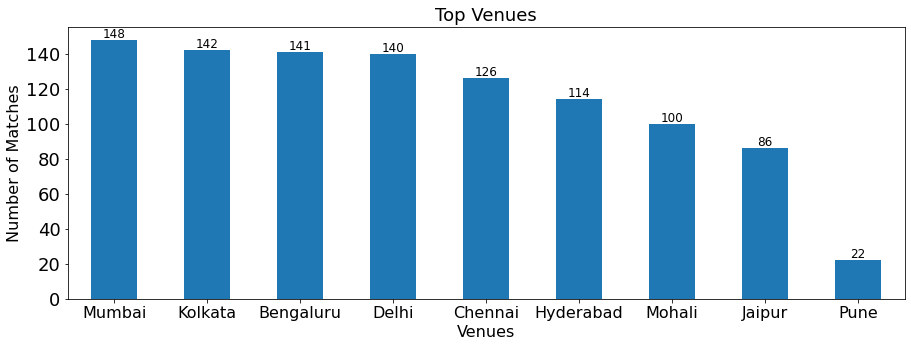

In [44]:
plt.figure(figsize=(15,5))
g=df_merged_venues['venue'].value_counts().plot(kind="bar")
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   fontsize=12,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Venues',fontsize=16)
plt.ylabel('Number of Matches',fontsize=16)
plt.title('Top Venues',fontsize=18)

In [45]:
def calculate_Win_Percentage():
    teams = ['MI', 'DC', 'SRH', 'RR', 'KKR', 'KXIP', 'CSK', 'RCB']
    win_percent = []
    for team in teams:
        row = {}
        df_team = df_merged.loc[df_merged['home_team'].str.contains(team) | 
                                        df_merged['away_team'].str.contains(team)]
        games = len(df_team.index)
        win = df_team.apply(lambda x : True if x['winner'] == team else False, axis = 1)
        num_wins = len(win[win == True].index)
        row['team'] = team
        row['total_games'] = games
        row['total_wins'] = num_wins
        row['win_pct'] = (num_wins / games) * 100
        win_percent.append(row)
    return win_percent

In [46]:
win_percent = calculate_Win_Percentage()
df_win_percent = pd.DataFrame(win_percent, index=None) 
df_win_percent = df_win_percent.sort_values('total_wins',ascending=False).reset_index()
df_win_percent

,index,team,total_games,total_wins,win_pct
0,0,MI,400,236,59.000000
1,6,CSK,372,226,60.752688
2,4,KKR,388,202,52.061856
3,2,SRH,394,178,45.177665
4,7,RCB,387,176,45.478036
5,1,DC,388,170,43.814433
6,3,RR,335,161,48.059701
7,5,KXIP,350,160,45.714286


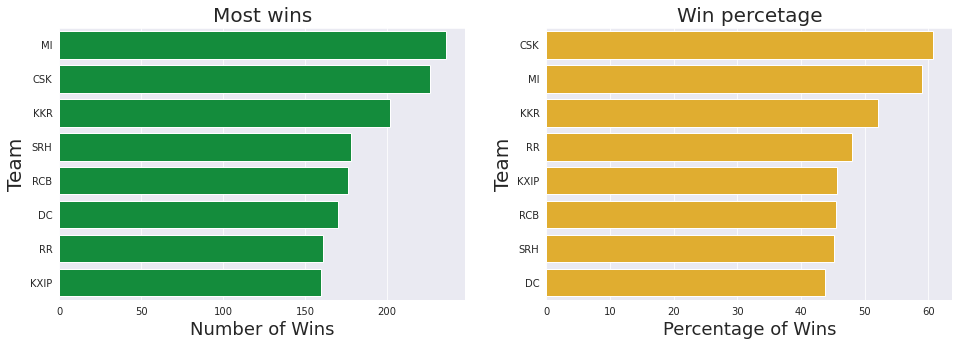

In [47]:
f = plt.figure(figsize=(16, 5))
gs = f.add_gridspec(1, 2)
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 0])    
    g1 = sns.barplot(y="team",x="total_wins",data=df_win_percent, palette=["#00a035"])
    g1.axes.set_title("Most wins",fontsize=20)
    g1.set_xlabel("Number of Wins",fontsize=18)
    g1.set_ylabel('Team',fontsize=20)
df2_win_percent = df_win_percent.sort_values('win_pct',ascending=False).reset_index()    
with sns.axes_style("darkgrid"):
    ax = f.add_subplot(gs[0, 1])    
    g1 = sns.barplot(y="team",x="win_pct",data=df2_win_percent,palette=["#fdb913"])
    g1.axes.set_title("Win percetage",fontsize=20)
    g1.set_xlabel("Percentage of Wins",fontsize=18)
    g1.set_ylabel('Team',fontsize=20)

In [48]:
def update_homewins(x):
    t1=x[6]
    t2=x[11]
    if(t1 == t2):
        return 'Home Win'
    else:
        return 'Away Win'

In [49]:
df_merged['Win Type']=df_merged.apply(update_homewins,axis=1)

In [50]:
df_merged['Win Type'].value_counts()

Home Win    848
Away Win    673
Name: Win Type, dtype: int64

In [51]:
Team_wins=df_merged[df_merged.innings_id == 2]

C:\Users\Susharan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top Venues')

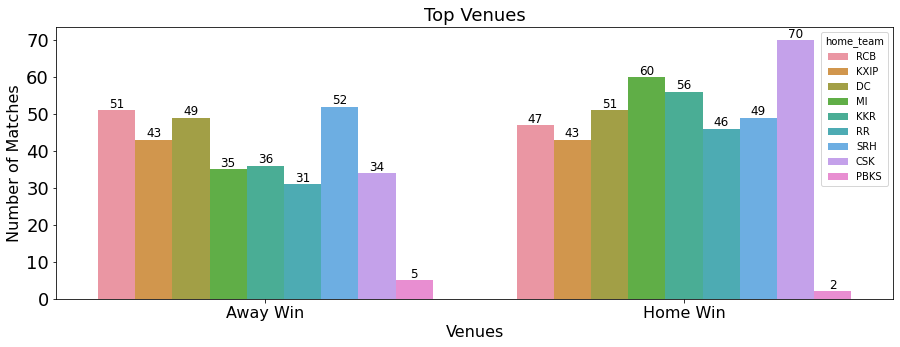

In [52]:

plt.figure(figsize=(15,5))
sns.set_palette(sns.color_palette("flare"))
g=sns.countplot(Team_wins['Win Type'],hue=Team_wins['home_team'])
for p in g.patches:
    g.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   fontsize=12,
                   xytext = (0, 6), 
                   textcoords = 'offset points',
                   rotation='horizontal')
plt.xticks(rotation = 0,fontsize=16)
plt.yticks(fontsize=18)
plt.xlabel('Venues',fontsize=16)
plt.ylabel('Number of Matches',fontsize=16)
plt.title('Top Venues',fontsize=18)

# Feature Extraction

In [53]:
df_merged=pd.get_dummies(data=df_merged,columns=['decision'],drop_first=True)

In [54]:
df_merged[(df_merged.venue == 'Others') & (df_merged.away_team == 'CSK')]

,index,Season,match_id,innings_id,current_innings,match_name,home_team,away_team,runs,toss_won,winner,venue,Win Type,decision_BOWL FIRST
1918,124,2009,392185,1,CSK,RCB v CSK,RCB,CSK,179,CSK,CSK,Others,Away Win,0
1935,125,2009,392185,2,RCB,RCB v CSK,RCB,CSK,87,CSK,CSK,Others,Away Win,0
3078,198,2009,392224,1,CSK,RCB v CSK,RCB,CSK,129,CSK,RCB,Others,Home Win,0
3099,199,2009,392224,2,RCB,RCB v CSK,RCB,CSK,132,CSK,RCB,Others,Home Win,0
4196,268,2010,419125,1,CSK,MI v CSK,MI,CSK,175,MI,MI,Others,Home Win,1
4207,269,2010,419125,2,MI,MI v CSK,MI,CSK,181,MI,MI,Others,Home Win,1
4312,276,2010,419129,1,RR,RR v CSK,RR,CSK,177,RR,RR,Others,Home Win,0
4330,277,2010,419129,2,CSK,RR v CSK,RR,CSK,160,RR,RR,Others,Home Win,0
4878,312,2010,419147,1,CSK,DC v CSK,SRH,CSK,138,CSK,SRH,Others,Home Win,0
4894,313,2010,419147,2,DC,DC v CSK,SRH,CSK,139,CSK,SRH,Others,Home Win,0


In [55]:
LE = LabelEncoder()

In [56]:
df_merged.drop('index',axis=1,inplace=True)

In [134]:
df_merged_innings1=df_merged[df_merged.innings_id == 1]
df_merged_innings2=df_merged[df_merged.innings_id == 2]

In [135]:
#Encoding all the attributes of type String using Label Encoder

lst=['current_innings','match_name','home_team','away_team','winner','venue','Win Type','toss_won',
     'decision_BOWL FIRST']

for i in lst:
    df_merged_innings1[i] = LE.fit_transform(df_merged_innings1[i])
    df_merged_innings2[i] = LE.fit_transform(df_merged_innings2[i])

C:\Users\Susharan\AppData\Local\Temp/ipykernel_10464/2649455600.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_innings1[i] = LE.fit_transform(df_merged_innings1[i])
C:\Users\Susharan\AppData\Local\Temp/ipykernel_10464/2649455600.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_merged_innings2[i] = LE.fit_transform(df_merged_innings2[i])


In [136]:
df_merged.columns

Index(['Season', 'match_id', 'innings_id', 'current_innings', 'match_name',
       'home_team', 'away_team', 'runs', 'toss_won', 'winner', 'venue',
       'Win Type', 'decision_BOWL FIRST'],
      dtype='object')

# Training and Prediction

In [138]:
lst=['match_id','current_innings','match_name','home_team','away_team','runs','venue','Win Type','toss_won',
     'decision_BOWL FIRST']

#lst=['match_id','current_innings','match_name','home_team','away_team','runs','Win Type']

df_merged_innings1=df_merged_innings1[lst]
df_merged_innings2=df_merged_innings2[lst]

In [139]:
#Splitting the dataset into 1st and 2nd Innings

X_innings1=df_merged_innings1.drop('runs',axis=1)
y_innings1=df_merged_innings1.runs

X_innings2=df_merged_innings2.drop('runs',axis=1)
y_innings2=df_merged_innings2.runs

In [140]:
#Splitting both the Innings' datasets into training and testing sets

X_train_innings1,X_test_innings1,y_train_innings1,y_test_innings1=train_test_split(X_innings1,y_innings1,test_size=0.20,
                                                                                   random_state=42)

X_train_innings2,X_test_innings2,y_train_innings2,y_test_innings2=train_test_split(X_innings2,y_innings2,test_size=0.20,
                                                                                   random_state=42)

# Linear Regression Model

In [108]:
#Fitting the data to linear regression model by training both the innings' datasets

model_lr=LinearRegression()

lr_grid = dict()

# cross-validation using Repeated Stratified K-fold method.
lr_cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)

# Grid Search CV method loops through the different hyper parameters determining the optimal values.
lr_grid_search = GridSearchCV(estimator=model_lr, param_grid=lr_grid, n_jobs=-1, cv=lr_cv, scoring='neg_root_mean_squared_error'
                              , error_score=0)

# Fitting the Model to the Dataset.
lr_grid_result_innings1=lr_grid_search.fit(X_train_innings1,y_train_innings1)

lr_grid_result_innings2=lr_grid_search.fit(X_train_innings2,y_train_innings2)

C:\Users\Susharan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Susharan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [109]:
#Prediction results of both the innings by the linear regression model

lr_predictions_innings1=lr_grid_result_innings1.predict(X_test_innings1)

lr_predictions_innings2=lr_grid_result_innings2.predict(X_test_innings2)

print(lr_predictions_innings1)
print(lr_predictions_innings2)

[149.62460148 144.97313905 147.16510107 148.74509968 144.95339596
 150.74784499 148.19281378 158.58720059 155.27566526 152.68287187
 146.36406459 151.37459817 149.79558974 157.16347343 154.22155045
 151.50884671 154.94852736 155.53937774 142.77000941 144.09419284
 154.50098963 157.24581194 148.11940487 152.58019998 157.55756032
 156.48354228 151.38928694 153.39020587 145.55785265 146.6404672
 158.14091662 154.20027477 144.18332442 147.66145685 145.5877467
 156.75825331 141.856239   143.90573398 149.24019086 151.57132765
 159.66213203 148.44992414 145.94456375 146.57236676 159.75147565
 155.61137973 144.81347367 143.87647443 155.8060266  145.82204794
 154.81951812 146.83990201 152.05271171 152.66393633 150.52805064
 145.02912232 144.53727894 154.45405293 154.95108428 146.76794699
 153.90336556 143.33360153 147.46459564 142.52204847 156.33998762
 144.97777805 155.93911049 151.51020744 157.3167161  145.74029513
 153.79781011 151.60370502 146.7753862  143.21557315 146.47391515
 148.7995689

In [110]:
print('Metrics for the 1st Innings Predictions:')
print('\n')
print('Mean Squared Error of Innings 1 predictions:',mean_squared_error(lr_predictions_innings1,y_test_innings1))
print('\n')
print('Root Mean Squared Error of Innings 1 predictions:',np.sqrt(mean_squared_error(lr_predictions_innings1,y_test_innings1)))
print('\n')
print('Mean Absolute Error of Innings 1 predictions:',mean_absolute_error(lr_predictions_innings1,y_test_innings1))
print('\n')

print('Metrics for the 2nd Innings Predictions:')
print('\n')
print('Mean Squared Error of Innings 2 predictions:',mean_squared_error(lr_predictions_innings2,y_test_innings2))
print('\n')
print('Root Mean Squared Error of Innings 2 predictions:',np.sqrt(mean_squared_error(lr_predictions_innings2,y_test_innings2)))
print('\n')
print('Mean Absolute Error of Innings 2 predictions:',mean_absolute_error(lr_predictions_innings2,y_test_innings2))
print('\n')

Metrics for the 1st Innings Predictions:


Mean Squared Error of Innings 1 predictions: 984.198832361764


Root Mean Squared Error of Innings 1 predictions: 31.371943394723953


Mean Absolute Error of Innings 1 predictions: 24.854638192944606


Metrics for the 2nd Innings Predictions:


Mean Squared Error of Innings 2 predictions: 942.4722812798607


Root Mean Squared Error of Innings 2 predictions: 30.699711420139778


Mean Absolute Error of Innings 2 predictions: 22.88439774986363




# Testing for Linear Regression

In [65]:
df_merged[df_merged.match_id == 1216516]

,Season,match_id,innings_id,current_innings,match_name,home_team,away_team,runs,toss_won,winner,venue,Win Type,decision_BOWL FIRST
20362,2020,1216516,1,SRH,CSK v SRH,CSK,SRH,161,SRH,SRH,Others,Away Win,0
20376,2020,1216516,2,CSK,CSK v SRH,CSK,SRH,157,SRH,SRH,Others,Away Win,0


In [66]:
# 0 - Bengaluru, 1-Chennai, 2-Delhi , 3-Hyderabad, 4-Jaipur,5-Kolkata,6- Mohali,7-Mumbai,8-Others

In [67]:
df_summary[df_summary.id == 1216516]

,season,id,name,short_name,description,home_team,away_team,toss_won,decision,1st_inning_score,2nd_inning_score,home_score,away_score,winner,result,start_date,end_date,venue_id,venue_name,home_captain,away_captain,pom,points,super_over,home_overs,home_runs,home_wickets,home_boundaries,away_overs,away_runs,away_wickets,away_boundaries,highlights,home_key_batsman,home_key_bowler,home_playx1,away_playx1,away_key_batsman,away_key_bowler,match_days,umpire1,umpire2,tv_umpire,referee,reserve_umpire
73,2020,1216516,Chennai Super Kings v Sunrisers Hyderabad,CSK v SRH,"14th Match (N), Indian Premier League at Dubai (DSC), Oct 2 2020",CSK,SRH,SRH,BAT FIRST,164/5,157/5,157/5,164/5,SRH,Sunrisers won by 7 runs,2020-10-02T14:00Z,2020-10-04T23:59Z,392627,Dubai International Cricket Stadium,MS Dhoni,David Warner,Priyam Garg,"Sunrisers Hyderabad 2, Chennai Super Kings 0",False,20.0,157.0,5.0,19.0,20.0,164.0,5.0,21.0,"Garg, Abhishek shine for Sunrisers as CSK lose three straight. Chasing 165, MS Dhoni left himself with a bit too much to do in the final overs as his team fell short by seven runs","Ravindra Jadeja,MS Dhoni","Deepak Chahar,Piyush Chawla","Faf du Plessis (BT),Shane Watson (AR),Ambati Rayudu (BT),Kedar Jadhav (AR),MS Dhoni (WK),Ravindra Jadeja (AR),Sam Curran (AR),Dwayne Bravo (AR),Shardul Thakur (BL),Piyush Chawla (AR),Deepak Chahar (BL)","David Warner (BT),Jonny Bairstow (WK),Manish Pandey (BT),Kane Williamson (BT),Priyam Garg (BT),Abhishek Sharma (BL),Abdul Samad (BT),Rashid Khan (BL),Bhuvneshwar Kumar (BL),T Natarajan (BL),Khaleel Ahmed (BL)","Priyam Garg,Abhishek Sharma","T Natarajan,Bhuvneshwar Kumar",02 October 2020 - night match (20-over match),Anil Chaudhary,Paul Reiffel,Yeshwant Barde,Prakash Bhatt,Anil Dandekar


In [83]:
def test_model(matchID,venue):
    tst1_venue=X_train_innings1[X_train_innings1.match_id == matchID]
    tst2_venue=X_train_innings2[X_train_innings2.match_id == matchID]
    
    tst1_venue.venue.replace({8:venue},inplace=True)
    tst2_venue.venue.replace({8:venue},inplace=True)
    
    lr_grid_predictions_innings1=lr_grid_result_innings1.predict(tst1_venue)

    lr_grid_predictions_innings2=lr_grid_result_innings2.predict(tst2_venue)

    print("Innings 1 Predictions:",lr_grid_predictions_innings1)
    print("Innings 2 Predictions:",lr_grid_predictions_innings2)
    
    if(lr_grid_predictions_innings1 > lr_grid_predictions_innings2):
        return "SRH is the Winner!"
    else:
        return "CSK is the Winner!"

In [133]:
test_model(1216516,1)

Innings 1 Predictions: [158.7858247]
Innings 2 Predictions: [158.7858247]


C:\Users\Susharan\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


'CSK is the Winner!'

In [69]:
#testing the model by passing a row value and checking the toss impact

tst1_toss=X_train_innings1[X_train_innings1.match_id == 1216516]
tst2_toss=X_train_innings2[X_train_innings2.match_id == 1216516]
print(tst1_toss)
print(tst2_toss)

       match_id  current_innings  match_name  home_team  away_team  venue  \
20362   1216516                8           7          0          8      8   

       Win Type  toss_won  decision_BOWL FIRST  
20362         0         7                    0  
       match_id  current_innings  match_name  home_team  away_team  venue  \
20376   1216516                0           7          0          8      8   

       Win Type  toss_won  decision_BOWL FIRST  
20376         0         7                    0  


In [70]:
tst1_toss['toss_won'].replace({11:7},inplace=True)
tst2_toss['toss_won'].replace({11:7},inplace=True)

C:\Users\Susharan\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [71]:
lr_grid_predictions_innings1=lr_grid_result_innings1.predict(tst1_toss)

lr_grid_predictions_innings2=lr_grid_result_innings2.predict(tst2_toss)

print(lr_grid_predictions_innings1)
print(lr_grid_predictions_innings2)

[155.46201698]
[160.94392495]


# XGBoost Regressor

In [111]:
model_xgb=XGBRegressor()

#n_estimators = [10,100,1000]
#xgbc_learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
#xgbc_subsample = [0.3,0.4,0.5,.6,0.7,0.8,0.9]
#xgbc_max_depth = [3, 4, 5, 6, 7, 8, 9]
#colsample_bytree = [0.5,0.6,0.7,0.8,0.9],
#xgbc_min_child_weight = [1, 2, 3, 4]

xgbc_n_estimators = [1000]
xgbc_learning_rate = [0.01]
xgbc_subsample = [0.7]
xgbc_max_depth = [8]
xgbc_min_child_weight = [1]

grid = dict(n_estimators=xgbc_n_estimators,learning_rate=xgbc_learning_rate,subsample=xgbc_subsample,max_depth=xgbc_max_depth,
min_child_weight=xgbc_min_child_weight)

xgbc_cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)

xgbc_grid_search = GridSearchCV(estimator=model_xgb, param_grid=grid, n_jobs=-1, cv=xgbc_cv, 
                                scoring='neg_root_mean_squared_error',error_score=0)

xgb_result_innings1=xgbc_grid_search.fit(X_train_innings1,y_train_innings1)

xgb_result_innings2=xgbc_grid_search.fit(X_train_innings2,y_train_innings2)

C:\Users\Susharan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Susharan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [112]:
xgb_predictions_innings1=xgb_result_innings1.predict(X_test_innings1)

xgb_predictions_innings2=xgb_result_innings2.predict(X_test_innings2)

In [113]:
print('Mean Squared Error of Innings 1 predictions:')
print(mean_squared_error(xgb_predictions_innings1,y_test_innings1))
print('\n')
print('Root Mean Squared Error of Innings 1 predictions:')
print(np.sqrt(mean_squared_error(xgb_predictions_innings1,y_test_innings1)))
print('\n')
print('Mean Absolute Error of Innings 1 predictions:')
print(mean_absolute_error(xgb_predictions_innings1,y_test_innings1))

print('\n')
print('Mean Squared Error of Innings 2 predictions:')
print(mean_squared_error(xgb_predictions_innings2,y_test_innings2))
print('\n')
print('Root Mean Squared Error of Innings 2 predictions:')
print(np.sqrt(mean_squared_error(xgb_predictions_innings2,y_test_innings2)))
print('\n')
print('Mean Absolute Error of Innings 2 predictions:')
print(mean_absolute_error(xgb_predictions_innings2,y_test_innings2))

Mean Squared Error of Innings 1 predictions:
1007.3712639495943


Root Mean Squared Error of Innings 1 predictions:
31.73911252618123


Mean Absolute Error of Innings 1 predictions:
24.52885122860179


Mean Squared Error of Innings 2 predictions:
1073.7720042575338


Root Mean Squared Error of Innings 2 predictions:
32.76846051094763


Mean Absolute Error of Innings 2 predictions:
25.51056620949193


# Testing for XGBoost Regressor

In [76]:
#testing the model by passing a row value and checking the venue impact

tst1_venue_xgb=X_train_innings1[X_train_innings1.match_id == 1216516]
tst2_venue_xgb=X_train_innings2[X_train_innings2.match_id == 1216516]
print(tst1_venue_xgb)
print(tst2_venue_xgb)

       match_id  current_innings  match_name  home_team  away_team  venue  \
20362   1216516                8           7          0          8      8   

       Win Type  toss_won  decision_BOWL FIRST  
20362         0         7                    0  
       match_id  current_innings  match_name  home_team  away_team  venue  \
20376   1216516                0           7          0          8      8   

       Win Type  toss_won  decision_BOWL FIRST  
20376         0         7                    0  


In [77]:
tst1_venue_xgb.venue.replace({8:1},inplace=True)
tst2_venue_xgb.venue.replace({8:1},inplace=True)

C:\Users\Susharan\anaconda3\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [78]:
xgb_testing_predictions_venue_innings1=xgb_result_innings1.predict(tst1_venue_xgb)

xgb_testing_predictions_venue_innings2=xgb_result_innings2.predict(tst2_venue_xgb)

print(xgb_testing_predictions_venue_innings1)
print(xgb_testing_predictions_venue_innings2)

[132.99109]
[153.7763]


# Support Vector Regressor Model

In [141]:
regressor = SVR(kernel='rbf')

grid = dict()

svr_cv = RepeatedStratifiedKFold(n_splits=2, n_repeats=1, random_state=1)
svr_grid_search = GridSearchCV(estimator=regressor, param_grid=grid, n_jobs=-1, cv=svr_cv, 
                                scoring='neg_root_mean_squared_error',error_score=0)

svr_result_innings1=svr_grid_search.fit(X_train_innings1,y_train_innings1)
svr_result_innings2=svr_grid_search.fit(X_train_innings2,y_train_innings2)

C:\Users\Susharan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
C:\Users\Susharan\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


In [142]:
svr_grid_predictions_innings1=svr_result_innings1.predict(X_test_innings1)
svr_grid_predictions_innings2=svr_result_innings2.predict(X_test_innings2)

print(svr_grid_predictions_innings1)
print(svr_grid_predictions_innings2)

[152.66029107 150.32870973 147.67359155 157.8821983  147.67370063
 154.34395521 150.32781065 158.60787381 152.66000691 158.59090485
 147.67341883 156.70060861 156.70155282 158.90006038 156.70144492
 158.33986887 158.62609827 158.33975173 147.22921852 149.5609144
 158.90001779 156.70179558 147.93346945 156.70109423 158.90004246
 157.88240988 158.78592463 156.70139097 148.89954889 152.65926107
 158.33993474 158.33972245 147.22916482 148.90041164 150.32805147
 158.33974439 147.67330066 152.57606742 148.90030546 148.90021254
 158.78589771 152.66018451 147.93340828 147.67340973 158.60794527
 158.89999535 150.32893455 147.93291903 158.33978834 148.90026564
 158.89999311 152.57628037 158.33994205 158.60800577 154.34402395
 147.22932588 150.32883822 158.89998411 158.33998596 147.67347336
 156.70133701 147.22917827 149.56163793 147.93289862 158.89997515
 152.65911903 158.90001554 152.65979385 158.90004022 147.22902395
 152.57571241 154.34464243 148.89978779 147.93327576 152.57631586
 149.560988

In [143]:
print('Mean Squared Error of Innings 1 predictions:')
print(mean_squared_error(svr_grid_predictions_innings1,y_test_innings1))
print('\n')
print('Root Mean Squared Error of Innings 1 predictions:')
print(np.sqrt(mean_squared_error(svr_grid_predictions_innings1,y_test_innings1)))
print('\n')
print('Mean Absolute Error of Innings 1 predictions:')
print(mean_absolute_error(svr_grid_predictions_innings1,y_test_innings1))

print('\n')
print('Mean Squared Error of Innings 2 predictions:')
print(mean_squared_error(svr_grid_predictions_innings2,y_test_innings2))
print('\n')
print('Root Mean Squared Error of Innings 2 predictions:')
print(np.sqrt(mean_squared_error(svr_grid_predictions_innings2,y_test_innings2)))
print('\n')
print('Mean Absolute Error of Innings 2 predictions:')
print(mean_absolute_error(svr_grid_predictions_innings2,y_test_innings2))

Mean Squared Error of Innings 1 predictions:
951.9100934637697


Root Mean Squared Error of Innings 1 predictions:
30.853040262894186


Mean Absolute Error of Innings 1 predictions:
24.63546814878192


Mean Squared Error of Innings 2 predictions:
995.8635014082982


Root Mean Squared Error of Innings 2 predictions:
31.557305040327797


Mean Absolute Error of Innings 2 predictions:
23.442533101053705
